In [1]:
import pandas as pd
import os
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt

kick1 = pd.read_csv('kick1.dat', sep = ' ', header = None, names = ['x', 'y', 'z'])
kick2 = pd.read_csv('kick2.dat', sep = ' ', header = None, names = ['x', 'y', 'z'])

In [2]:
time = np.linspace(0, 1, 20)
time
print(time)

[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]


In [3]:
def gradiente_ssr(t, y, b):
    if(t.size != y.size):
        raise Exception("Os vetores t e y devem ter o mesmo tamanho.")
    
    res1 = 0
    res2 = 0
    for i in range(t.size):
        res1 += b[0] + b[1] * t[i] - y[i]
    for i in range(t.size):
        res2 += (b[0] + b[1]* t[i] - y[i]) * t[i]
    return res1/t.size, res2/t.size

def gradient_descent(gradient_ssr, t, y, coeff_start, learning_rate=0.1, n_iter=50, tolerance=1e-11):
    coeff_output = coeff_start
    for _ in range(n_iter):
        diff = -learning_rate * np.array(gradient_ssr(t, y, coeff_output))
        if np.all(np.abs(diff) <= tolerance):
            print(np.abs(diff))
            print(tolerance)
            break
        coeff_output += diff
    return coeff_output
def predict_points(coefficients, time):
    lin_function = lambda b0, b1, t: b0 + b1*t
    points_array = []
    for t in time:
        points_array.append(lin_function(coefficients[0], coefficients[1], t))
    return points_array


In [4]:
#x = np.array([5, 15, 25, 35, 45, 55])
#y = np.array([5, 20, 14, 32, 22, 38])
#gradient_descent(gradient_ssr, x, y, coeff_start=[0.5, 0.5], learning_rate=0.0008, n_iter=100_000)


In [5]:
y1 = np.array(kick1['y'])
x1 = np.array(kick1['x'])
z1 = np.array(kick1['z'])

y2 = np.array(kick2['y'])
x2 = np.array(kick2['x'])
z2 = np.array(kick2['z'])


In [6]:
coeff_y1 = gradient_descent(gradiente_ssr, time, y1, coeff_start=[2.1, -.975], learning_rate=0.0000001, n_iter=100000)
coeff_x1 = gradient_descent(gradiente_ssr, time, x1, coeff_start=[-.22, -1], learning_rate=0.0000001, n_iter=100000)
#coeff_z1 = gradient_descent(gradiente_ssr, time, z1, coeff_start=[.1, .1], learning_rate=0.000001, n_iter=100000)


print(coeff_x1)


[-0.22007665 -0.99998454]


[-0.21  -0.305 -0.368 -0.37  -0.48  -0.532 -0.575 -0.583 -0.618 -0.702
 -0.783 -0.842 -0.882 -0.93  -0.969 -0.989 -1.032 -1.088 -1.104 -1.192]


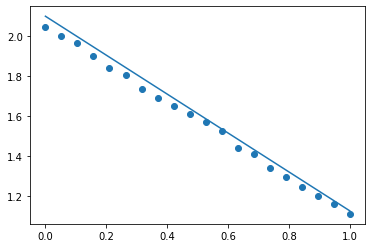

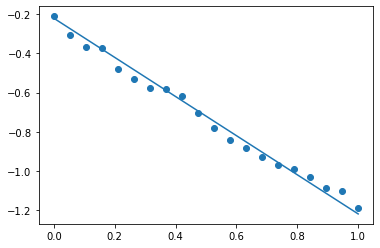

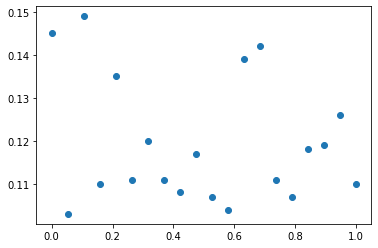

[-0.21  -0.305 -0.368 -0.37  -0.48  -0.532 -0.575 -0.583 -0.618 -0.702
 -0.783 -0.842 -0.882 -0.93  -0.969 -0.989 -1.032 -1.088 -1.104 -1.192]
[-0.2200766546557436, -0.27270742017922855, -0.3253381857027135, -0.37796895122619845, -0.4305997167496834, -0.48323048227316834, -0.5358612477966533, -0.5884920133201382, -0.6411227788436231, -0.6937535443671081, -0.7463843098905931, -0.7990150754140781, -0.8516458409375629, -0.9042766064610479, -0.9569073719845329, -1.009538137508018, -1.0621689030315027, -1.1147996685549877, -1.1674304340784727, -1.2200611996019577]


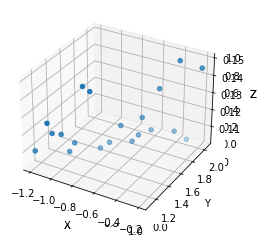

In [7]:
y1_predicted = predict_points(coeff_y1, time)
x1_predicted = predict_points(coeff_x1, time)
#z1_predicted = predict_points(coeff_z1, time)

print(x1)


plt.scatter(time, y1)
plt.plot(time, y1_predicted)
plt.show()
plt.scatter(time, x1)
plt.plot(time, x1_predicted)
plt.show()
plt.scatter(time, z1)
plt.plot(z1_predicted)
plt.show()

ax = plt.axes(projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
# Data for three-dimensional scattered points
#ax.scatter3D(x1_predicted, y1_predicted, z1_predicted);

#fig = plt.figure()
#ax = plt.axes(projection='3d')
#ax.plot(x1_predicted, y1_predicted, z1_predicted)
#plt.show()

ax = plt.axes(projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
#ax.set_xlim3d(-3, 3)
#ax.set_ylim3d(1, 2.1)
#ax.set_zlim3d(0.1, 0.15)
# Data for three-dimensional scattered points
print(x1)
print(x1_predicted)
ax.scatter3D(x1, y1, z1);
#ax.plot(x1_predicted, y1_predicted, z1_predicted)
plt.show()

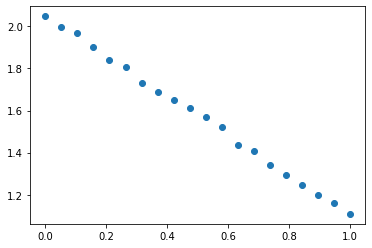

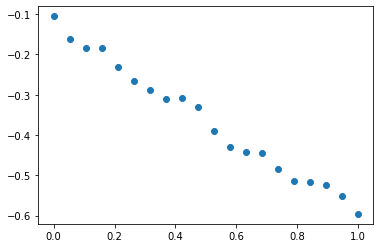

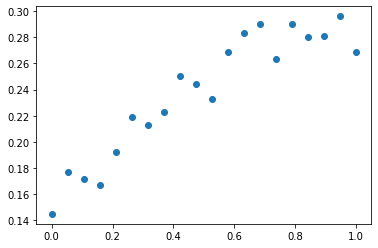

In [8]:

plt.scatter(time, y2)
plt.show()
plt.scatter(time, x2)
plt.show()
plt.scatter(time, z2)
plt.show()

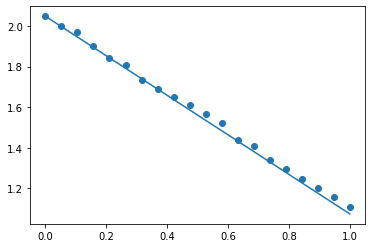

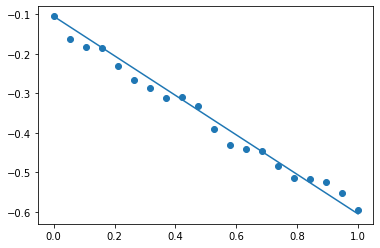

[-0.105 -0.162 -0.184 -0.185 -0.23  -0.266 -0.287 -0.311 -0.309 -0.331
 -0.391 -0.431 -0.441 -0.445 -0.484 -0.514 -0.516 -0.524 -0.552 -0.596]
[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]


In [15]:
coeff_y2 = gradient_descent(gradiente_ssr, time, y2, coeff_start=[y2[0], -.975], learning_rate=0.0000001, n_iter=100000)
coeff_x2 = gradient_descent(gradiente_ssr, time, x2, coeff_start=[x2[0], -.5], learning_rate=0.0000001, n_iter=100000)
y2_predicted = predict_points(coeff_y2, time)
x2_predicted = predict_points(coeff_x2, time)


plt.scatter(time, y2)
plt.plot(time, y2_predicted)
plt.show()
plt.scatter(time, x2)
plt.plot(time, x2_predicted)
plt.show()



#ax = plt.axes(projection='3d')
#ax.set_xlabel('X')
#ax.set_ylabel('Y')
#ax.set_zlabel('Z')
#ax.set_xlim3d(-3, 3)
# Data for three-dimensional scattered points
print(x2)
print(time)
#ax.scatter3D(x2, y2, z2);
#ax.plot(x1_predicted, y1_predicted, z1_predicted)
#plt.show()

In [ ]:
mymodel = np.poly1d(np.polyfit(time, y1, 3))
print(mymodel)
plt.scatter(time, y1)
plt.plot(time, mymodel(time))
plt.show()

In [ ]:
mymodel = np.poly1d(np.polyfit(time, x1, 3))
print(mymodel)
plt.scatter(time, x1)
plt.plot(time, mymodel(time))
plt.show()

In [ ]:
mymodel = np.poly1d(np.polyfit(y1, x1, 2))
print(mymodel)
plt.scatter(, x1)

plt.show()